>[Діагональна матриця](#scrollTo=nEmhzK2qEjfJ)

>[Ортогональна матриця](#scrollTo=2m9CT639anc5)

>[Симетрична матриця](#scrollTo=DhUIcqsZ-uLV)

>[Додатно визначена матриця](#scrollTo=8Q9joMomz9yj)

>[LU-розклад](#scrollTo=balYTx9ODFCb)

>[Розклад Холецького](#scrollTo=WgXtD5fyFBlM)

>[SVD розклад](#scrollTo=BKaJjoR8JrDw)

>[Практичне застосування: зменшення розмірності зображень](#scrollTo=lhKVlHA-RS6z)

>[PCA](#scrollTo=W7J6GANkSnO-)

>[Додаткові матеріали](#scrollTo=N749RZWjWYu3)



#Діагональна матриця



In [ ]:
import numpy as np

# Створення діагональної матриці
diagonal_elements = np.array([2, 3, 4])
diagonal_matrix = np.diag(diagonal_elements)

print("Діагональна матриця:")
print(diagonal_matrix)

# Обчислення оберненої матриці
inverse_matrix = np.linalg.inv(diagonal_matrix)

# Обчислення оберненої матриці за властивістю діагональної матриці
inverse_diagonal_matrix = np.diag(1 / diagonal_elements)

print("\nОбернена матриця:")
print(inverse_matrix)

print("\nОбернена діагональна матриця:")
print(inverse_diagonal_matrix)


Діагональна матриця:
[[2 0 0]
 [0 3 0]
 [0 0 4]]

Обернена матриця:
[[0.5        0.         0.        ]
 [0.         0.33333333 0.        ]
 [0.         0.         0.25      ]]

Обернена діагональна матриця:
[[0.5        0.         0.        ]
 [0.         0.33333333 0.        ]
 [0.         0.         0.25      ]]


#Ортогональна матриця

Ортогональні матриці, якщо розглядати як оператори, що діють на вектори, важливі, оскільки вони виробляють перетворення, які зберігають довжини векторів та відносні кути між ними.



In [ ]:
import numpy as np

# Створення ортогональної матриці
# orthogonal_matrix = np.array([[2/3, 1/3, -2/3],
#                                [2/3, -2/3, 1/3],
#                                [1/3, 2/3, 2/3]])

orthogonal_matrix = np.array([[1/3, -2/3, 2/3],
                               [2/3, 2/3, 1/3],
                               [-2/3, 1/3, 2/3]])


# Обчислення оберненої матриці
inverse_orthogonal_matrix = np.linalg.inv(orthogonal_matrix)

print("Ортогональна матриця:")
print(orthogonal_matrix)

print("\nОбернена матриця:")
print(inverse_orthogonal_matrix)

# Обчислення детермінанту
determinant = np.linalg.det(orthogonal_matrix)

print("Детермінант ортогональної матриці:", determinant)


Ортогональна матриця:
[[ 0.33333333 -0.66666667  0.66666667]
 [ 0.66666667  0.66666667  0.33333333]
 [-0.66666667  0.33333333  0.66666667]]

Обернена матриця:
[[ 0.33333333  0.66666667 -0.66666667]
 [-0.66666667  0.66666667  0.33333333]
 [ 0.66666667  0.33333333  0.66666667]]
Детермінант ортогональної матриці: 1.0


#Симетрична матриця

In [ ]:
import numpy as np

# Створення симетричної матриці
A = np.array([[4, 1, 2],
              [1, 5, 3],
              [2, 3, 6]])

# Знаходження власних значень та власних векторів
eig_vals, eig_vects = np.linalg.eigh(A)

# Формування діагональної матриці з власних значень
D = np.diag(eig_vals)

# Формування матриці власних векторів
V = eig_vects

# Відновлення початкової матриці за допомогою розкладу
reconstr_A = V.dot(D).dot(V.T)

print("Початкова симетрична матриця A:")
print(A)
print("\nДіагональна матриця власних значень D:")
print(D)
print("\nМатриця власних векторів V:")
print(V)
print("\nВідновлена матриця з розкладу:")
print(reconstr_A)

print("\nПеревірка, що матриця власних векторів є ортогональною:")


# np.allclose - перевірка рівності аргументів із заданою точністю
orth = np.allclose(np.dot(eig_vects.T, eig_vects), np.eye(A.shape[0]))

print(np.dot(eig_vects.T, eig_vects))

print(np.eye(A.shape[0]))

if orth:
    print("Власні вектори є ортогональними.")
else:
    print("Власні вектори не є ортогональними.")

Початкова симетрична матриця A:
[[4 1 2]
 [1 5 3]
 [2 3 6]]

Діагональна матриця власних значень D:
[[2.19439717 0.         0.        ]
 [0.         3.38677016 0.        ]
 [0.         0.         9.41883268]]

Матриця власних векторів V:
[[-0.4412247  -0.81558342 -0.37435872]
 [-0.57735027  0.57735027 -0.57735027]
 [ 0.68701342 -0.03860509 -0.7256185 ]]

Відновлена матриця з розкладу:
[[4. 1. 2.]
 [1. 5. 3.]
 [2. 3. 6.]]

Перевірка, що матриця власних векторів є ортогональною:
[[ 1.00000000e+00  2.12543865e-16 -1.53049606e-16]
 [ 2.12543865e-16  1.00000000e+00  3.05772411e-16]
 [-1.53049606e-16  3.05772411e-16  1.00000000e+00]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
Власні вектори є ортогональними.


#Додатно визначена матриця



Перевірка чи є власні значення додатніми

In [ ]:
import numpy as np

# Задана матриця
matrix = np.array([[4, 1, 2],
                    [1, 5, 3],
                    [2, 3, 6]])

matrix = np.array([[2, -1, 0],
                   [-1, 2, -1],
                   [0, -1, 2]])



# Обчислення власних значень
eigenvalues, _ = np.linalg.eig(matrix)



# Перевірка знаків власних значень
if all(eig > 0 for eig in eigenvalues):
    print("Матриця є додатно визначеною.", [eig for eig in eigenvalues])
else:
    print("Матриця не є додатно визначеною.")


Матриця є додатно визначеною. [np.float64(3.4142135623730914), np.float64(1.9999999999999998), np.float64(0.5857864376269049)]


Перевірка, чи є всі верхні ліві детермінанти позитивними

In [ ]:
import numpy as np

# Задана матриця
# matrix = np.array([[4, -1, 2],
#                    [-1, 5, 3],
#                    [2, 3, 6]])

matrix = np.array([[2, -1, 0],
                   [-1, 2, -1],
                   [0, -1, 2]])



# Розмір матриці
n = matrix.shape[0]

# Перевірка знаку лівих верхніх піддетермінантів
positive_definite = all(np.linalg.det(matrix[:i, :i]) > 0 for i in range(1, n + 1))

if positive_definite:
    print("Матриця є додатно визначеною.", [np.linalg.det(matrix[:i, :i]) for i in range(1, n + 1)])
else:
    print("Матриця не є додатно визначеною.")


Матриця є додатно визначеною. [np.float64(2.0), np.float64(2.9999999999999996), np.float64(4.0)]


У наступному коді ми перевіряємо, чи всі елементи на головній діагоналі верхньотрикутної матриці додатні. Якщо так, то матриця вважається додатно визначеною. Якщо хоча б один елемент на головній діагоналі не додатній, то матриця не є додатно визначеною.

In [ ]:
import numpy as np

# Задана матриця
matrix = np.array([[4, -1, 2],
                   [0, 5, 3],
                   [0, 0, 6]])

# Перевірка, чи є головна діагональ додатньою
if all(matrix[i, i] > 0 for i in range(matrix.shape[0])):
    print("Матриця є додатно визначеною.")
else:
    print("Матриця не є додатно визначеною.")


Матриця є додатно визначеною.


In [ ]:
import numpy as np

def upper_triangular(matrix):
    """
    Перетворює задану матрицю до верхньотрикутного вигляду за допомогою тотожних перетворень.

    Параметри:
    - matrix: numpy array, задана матриця.

    Повертає:
    - upper: numpy array, верхньотрикутна матриця, еквівалентна вхідній матриці.
    """

    # Копіюємо матрицю, щоб не змінювати оригінал
    upper = np.copy(matrix)

    # Розміри матриці
    rows, cols = upper.shape

    # Проходимося по кожному стовпцю
    for j in range(cols):
        # Шукаємо ненульовий елемент у стовпці j, починаючи з рядка j
        for i in range(j, rows):
            if upper[i, j] != 0:
                # Знаходимо ненульовий елемент у стовпці і переставляємо його на позицію j
                upper[[i, j]] = upper[[j, i]]
                # Застосовуємо елементарні тотожні перетворення, щоб обнулити всі елементи під діагоналлю
                for k in range(i + 1, rows):
                    c = upper[k, j] / upper[j, j]
                    upper[k] -= c * upper[j]
                break

    return upper

# Приклад використання

# matrix = np.array([[4.0, -1.0, 2.0],
#                    [-1.0, 5.0, 3.0],
#                    [2.0, 3.0, 6.0]])

matrix = np.array([[2.0, -1.0, 0.0],
                   [-1.0, 2.0, -1.0],
                   [0.0, -1.0, 2.0]])

upper_triangular_matrix = upper_triangular(matrix)
print("Верхньотрикутна матриця:")
print(upper_triangular_matrix)


Верхньотрикутна матриця:
[[ 2.         -1.          0.        ]
 [ 0.          1.5        -1.        ]
 [ 0.          0.          1.33333333]]


In [ ]:
# Перевірка, чи є головна діагональ додатньою
if all(upper_triangular_matrix[i, i] > 0 for i in range(upper_triangular_matrix.shape[0])):
    print("Матриця є додатно визначеною.")
else:
    print("Матриця не є додатно визначеною.")


Матриця є додатно визначеною.


#LU-розклад

In [ ]:
import numpy as np

A = np.array([[1, 2, 3],
              [4, -1, 0],
              [-2, 5, 1]])

E1 = np.array([[1,  0, 0],
               [-4, 1, 0],
               [0,  0, 1]])

E2 = np.array([[1, 0, 0],
               [0, 1, 0],
               [2, 0, 1]])

E3 = np.array([[1, 0, 0],
               [0, 1, 0],
               [0, 1, 1]])

E1_inverse = np.linalg.inv(E1)
E2_inverse = np.linalg.inv(E2)
E3_inverse = np.linalg.inv(E3)

U = E3.dot(E2).dot(E1).dot(A)
L = E1_inverse.dot(E2_inverse).dot(E3_inverse)

print("\nStep 1 & 2: Upper traingular matrix of A using elementary matrices:")
print(U)
print("\nStep 1 & 3: Lower traingular matrix of A using inverse elementary matrices:")
print(L)

U_inverse = np.linalg.inv(U)
L_inverse = np.linalg.inv(L)

b1 = np.array([[3],
               [9],
               [-8]]) # column vector

c1 = L_inverse.dot(b1)
x1 = U_inverse.dot(c1)
print("\nStep 4a: Solve c1 given same left hand side matrix A but different right hand side b1:")
print(c1)
print("\nStep 5b: Solution x1 given same left hand side matrix A but different right hand side b1:")
print(x1)

b2 = np.array([[28],
               [22],
               [-11]]) # column vector

c2 = L_inverse.dot(b2)
x2 = U_inverse.dot(c2)
print("\nStep 4a: Solve c2 given same left hand side matrix A but different right hand side b2:")
print(c2)
print("\nStep 5b: Solution x2 given same left hand side matrix A but different right hand side b2:")
print(x2)


Step 1 & 2: Upper traingular matrix of A using elementary matrices:
[[  1   2   3]
 [  0  -9 -12]
 [  0   0  -5]]

Step 1 & 3: Lower traingular matrix of A using inverse elementary matrices:
[[ 1.  0.  0.]
 [ 4.  1.  0.]
 [-2. -1.  1.]]

Step 4a: Solve c1 given same left hand side matrix A but different right hand side b1:
[[ 3.]
 [-3.]
 [-5.]]

Step 5b: Solution x1 given same left hand side matrix A but different right hand side b1:
[[ 2.]
 [-1.]
 [ 1.]]

Step 4a: Solve c2 given same left hand side matrix A but different right hand side b2:
[[ 28.]
 [-90.]
 [-45.]]

Step 5b: Solution x2 given same left hand side matrix A but different right hand side b2:
[[ 5.]
 [-2.]
 [ 9.]]


#Розклад Холецького

In [ ]:
from numpy import array
from numpy.linalg import cholesky
# define a 3x3 matrix
A = array([[36, 30, 18], [30, 41, 23], [18, 23, 14]])
print(A)
# Cholesky decomposition
L = cholesky(A)
print(L)
print(L.T)
# reconstruct
B = L.dot(L.T)
print(B)

[[36 30 18]
 [30 41 23]
 [18 23 14]]
[[6. 0. 0.]
 [5. 4. 0.]
 [3. 2. 1.]]
[[6. 5. 3.]
 [0. 4. 2.]
 [0. 0. 1.]]
[[36. 30. 18.]
 [30. 41. 23.]
 [18. 23. 14.]]


#SVD розклад

**Крок 1**

Обчислення добутку $AA^{T}$

Якщо матриця $A$ прямокутна, ця операція дозволить отримати квадратну матрицю. Це важливо для подальших операцій.

Наприклад

In [ ]:
import numpy as np

# Приклад матриці
matrix_a = np.array([[1, 2, 3],
                     [4, 5, 6]])

# matrix_a = np.array([[4, 0, 5],
#                     [3, -5, 7],
#                      [6, 1, 7]])

# matrix_a = np.array([[4, 0],
#                     [3, -5]])




# Обчислення транспонованої матриці
matrix_a_transposed = np.transpose(matrix_a)  # або matrix_a.T

# Обчислення добутку матриці на її транспоновану
result = np.dot(matrix_a_transposed, matrix_a)  # або matrix_a @ matrix_a_transposed

# Виведення результату
print("Матриця A:")
print(matrix_a)

print("\nТранспонована матриця A:")
print(matrix_a_transposed)

print("\nДобуток матриці A на її транспоновану:")
print(result)


Матриця A:
[[1 2 3]
 [4 5 6]]

Транспонована матриця A:
[[1 4]
 [2 5]
 [3 6]]

Добуток матриці A на її транспоновану:
[[17 22 27]
 [22 29 36]
 [27 36 45]]


**Крок 2**

Обчислення власних значень та векторів.

Для цього потрібно записати характеристичне рівняння та розв'язати його. Детально ця процедура була розглянута у попередній темі.



In [ ]:
# Обчислення власних векторів та власних значень
eigenvalues, eigenvectors = np.linalg.eig(result)

# Виведення результату
print("Власні значення:")
print(eigenvalues)

print("\nВласні вектори:")
print(eigenvectors)

Власні значення:
[9.04026725e+01 5.97327474e-01 7.23299057e-16]

Власні вектори:
[[-0.42866713 -0.80596391  0.40824829]
 [-0.56630692 -0.11238241 -0.81649658]
 [-0.7039467   0.58119908  0.40824829]]


**Крок 3**

Тепер, коли ми отримали власні вектори та власні значення, необхідно скласти матриці $V$ та $Σ$.



In [ ]:
# Отримання індексів, які відсортовують масив за першим стовпцем
sorted_indices = np.argsort(eigenvectors[:, 0])

V = eigenvectors[sorted_indices]

# Виведення результату
print("Вихідний масив:")
print(eigenvectors)

print("\nМатриця V:")
print(V)

Вихідний масив:
[[-0.42866713 -0.80596391  0.40824829]
 [-0.56630692 -0.11238241 -0.81649658]
 [-0.7039467   0.58119908  0.40824829]]

Матриця V:
[[-0.7039467   0.58119908  0.40824829]
 [-0.56630692 -0.11238241 -0.81649658]
 [-0.42866713 -0.80596391  0.40824829]]


діагональні значення в сигмах завжди розташовані в порядку спадання, тому вектори також розміщуються у відповідному порядку.

In [ ]:
# Створення діагонального масиву
Sigma = np.diag(sorted(eigenvalues, reverse=True))
Sigma = np.sqrt(Sigma)
print("\nМатриця Σ:")
print(Sigma)


Матриця Σ:
[[9.50803200e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 7.72869636e-01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.68942198e-08]]


В методі PCA головні компоненти відповідають верхньому k-му діагональному елементу, який фіксує найбільшу дисперсію. Чим вище значення, тим важливіший компонент і тим більшу дисперсію він описує.

**Крок 4**

Тепер, коли у нас є матриці V і сигма, настав час знайти U.

Рівняння виглядає так.

Оскільки

$A=UΣV^{T}$

Отримаємо

$AVΣ^{T}=U$

In [ ]:
AV = np.dot(matrix_a, V)

Далі нам потрібно перетворити матрицю так, щоб отримати на одиничні вектори у стовпцях матриці.

Спосіб, яким ми робимо це, беремо значення у стовпцях і ділимо їх на квадратний корінь із суми квадратів значень. Отже, у цьому випадку ми робимо наступне:

In [ ]:
def matrix_norm(mtr):

    # Обчислення кореня квадратного з суми елементів для кожного стовпця
    sqrt_sum_columns = np.sqrt(np.sum(mtr**2, axis=0))
    res = mtr / sqrt_sum_columns
    return res

AV = matrix_norm(AV)

print(AV)

[[-0.35514012 -0.55710354 -0.54389545]
 [-0.93481308 -0.83044304 -0.83915299]]


In [ ]:
U = np.dot(AV, Sigma.T)
U = matrix_norm(U)
print('Матриця U')
print(U)

Матриця U
[[-0.35514012 -0.55710354 -0.54389545]
 [-0.93481308 -0.83044304 -0.83915299]]


Отже, ми обчислили U, сигму та V і розклали матрицю A на три матриці, як наведено нижче.

In [ ]:
A = np.dot(np.dot(U, Sigma), V.T)
print('Початкова матриця A')
print(A)

Початкова матриця A
[[2.12675931 1.96062761 1.79449587]
 [5.88381446 5.10559745 4.32738037]]


In [ ]:
print(U)
print(Sigma)
print(V)

[[-0.35514012 -0.55710354 -0.54389545]
 [-0.93481308 -0.83044304 -0.83915299]]
[[9.50803200e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 7.72869636e-01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.68942198e-08]]
[[-0.7039467   0.58119908  0.40824829]
 [-0.56630692 -0.11238241 -0.81649658]
 [-0.42866713 -0.80596391  0.40824829]]


Порівняємо результат з розкладом за допомогою функції `np.linalg.svd`

In [ ]:
Uu, Ss, Vh = np.linalg.svd(matrix_a)

In [ ]:
print('SVD U ')
print(Uu)
print('SVD Sigma ')
print(Ss)
print('SVD Vh ')
print(Vh)

SVD U 
[[-0.3863177  -0.92236578]
 [-0.92236578  0.3863177 ]]
SVD Sigma 
[9.508032   0.77286964]
SVD Vh 
[[-0.42866713 -0.56630692 -0.7039467 ]
 [ 0.80596391  0.11238241 -0.58119908]
 [ 0.40824829 -0.81649658  0.40824829]]


Власні значення можна візуалізувати

Text(0, 0.5, 'Magnitude of singular value')

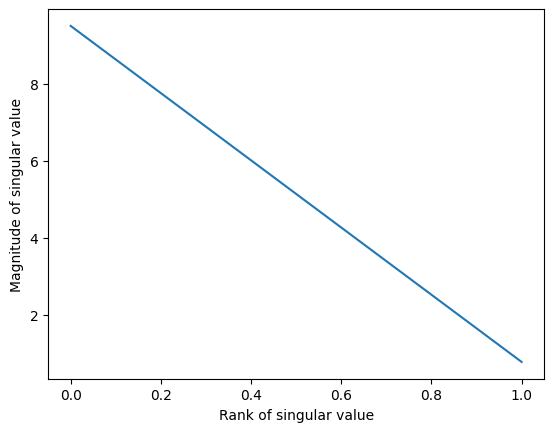

In [ ]:
import matplotlib.pyplot as plt
k = 2
plt.plot(np.arange(k), Ss[:k])
plt.xlabel('Rank of singular value')
plt.ylabel('Magnitude of singular value')

Отже, можемо бачити, що результати в цілому співпадають з точністю до знаків деяких векторів

Розуміння того, як розрахувати SVD розклад, допомагає отримати інтуїтивніше розуміння його застосувань, таких як PCA.

Ще одна особливість полягає в тому, що цей розклад буде працювати і для прямокутних матриць.


#Практичне застосування: зменшення розмірності зображень

Дані MNIST - це набір рукописних цифр, який часто використовується для завдань з розпізнавання зображень у машинному навчанні. Вони складаються з 28x28 пікселів і можуть бути легко завантажені за допомогою бібліотеки keras, яка містить набір даних MNIST.

In [ ]:
from keras.datasets import mnist

# Завантажуємо дані MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Виведемо розмірність навчальних та тестових зображень та міток
print("Розмірність навчальних зображень:", train_images.shape)
print("Розмірність тестових зображень:", test_images.shape)
print("Розмірність навчальних міток:", train_labels.shape)
print("Розмірність тестових міток:", test_labels.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Розмірність навчальних зображень: (60000, 28, 28)
Розмірність тестових зображень: (10000, 28, 28)
Розмірність навчальних міток: (60000,)
Розмірність тестових міток: (10000,)


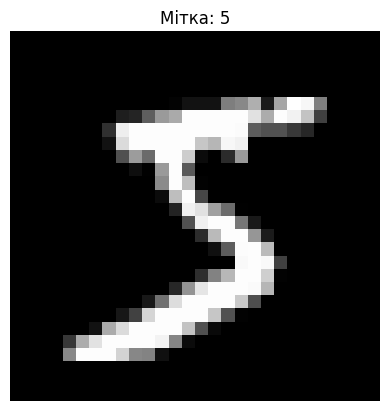

(28, 28)


<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# Візуалізація першого зображення з навчального набору
plt.imshow(train_images[0], cmap='gray')
plt.title(f'Мітка: {train_labels[0]}')
plt.axis('off')
plt.show()

plt.savefig('first_mnist_image.png')
print(np.shape(train_images[0]))


In [ ]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

In [ ]:
height, width = train_images[0].shape
channels = 1
flat_image = train_images[0].reshape(-1, width * channels)
flat_image.shape

(28, 28)

Shape of U=(28, 28)
Shape of S=(28,)
Shape of Vt=(28, 28)


Text(0, 0.5, 'Magnitude of singular value')

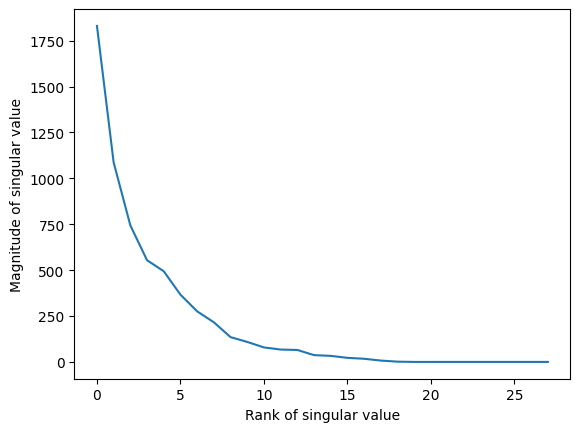

In [ ]:
U, S, Vt = np.linalg.svd(flat_image)
print(f"Shape of U={U.shape}")
print(f"Shape of S={S.shape}")
print(f"Shape of Vt={Vt.shape}")

k = 28
plt.plot(np.arange(k), S[:k])
plt.xlabel('Rank of singular value')
plt.ylabel('Magnitude of singular value')

In [ ]:
from sklearn.decomposition import TruncatedSVD
# Обрізати зображення за допомогою SVD
svd = TruncatedSVD(n_components=10)
truncated_image = svd.fit_transform(flat_image)
print(np.shape(truncated_image))

(28, 10)


In [ ]:
# Відновити зображення зі зменшеного представлення
reconstructed_image = svd.inverse_transform(truncated_image)

# Змінити форму зображення до оригінальної 3D форми
reconstructed_image = reconstructed_image.reshape(height, width, channels)

# Обрізати вихідні дані до цілих чисел у діапазоні [0, 255]
reconstructed_image = np.clip(reconstructed_image, 0 , 255 ).astype( 'uint8' )

In [ ]:
np.shape(reconstructed_image)

(28, 28, 1)

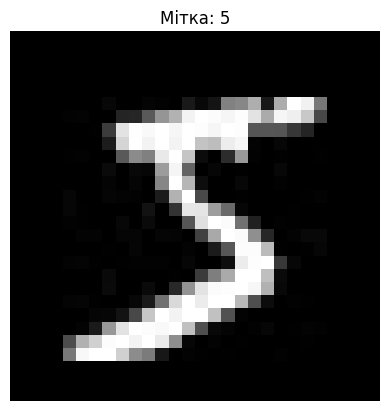

<Figure size 640x480 with 0 Axes>

In [ ]:
# Візуалізація першого зображення з навчального набору
plt.imshow(reconstructed_image, cmap='gray')
plt.title(f'Мітка: {train_labels[0]}')
plt.axis('off')
plt.show()

# Збереження зображення на жорсткий диск
plt.savefig('reconstructed_image.jpg')


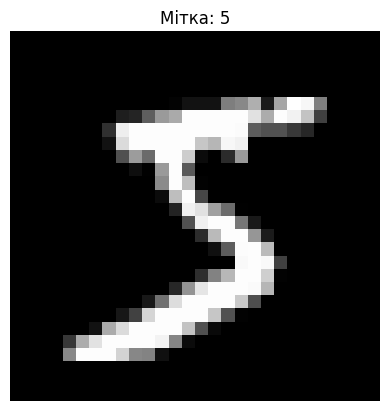

(28, 28)


<Figure size 640x480 with 0 Axes>

In [ ]:
plt.imshow(train_images[0], cmap='gray')
plt.title(f'Мітка: {train_labels[0]}')
plt.axis('off')
plt.show()

plt.savefig('first_mnist_image.png')
print(np.shape(train_images[0]))

In [ ]:
# Збереження зображення на жорсткий диск
plt.savefig('first_mnist_image.jpg')

<Figure size 640x480 with 0 Axes>

In [ ]:
import os

# Визначення розміру файлу у байтах
orig_file_size_bytes = os.path.getsize('./first_mnist_image.jpg')
print("Розмір файлу у байтах:", orig_file_size_bytes)

reconstr_file_size_bytes = os.path.getsize('./reconstructed_image.jpg')
print("Розмір файлу у байтах:", reconstr_file_size_bytes)

Розмір файлу у байтах: 5427
Розмір файлу у байтах: 5427


#PCA

Для ілюстрації роботи методу PCA в аналізі даних, розглянемо наступний приклад. Згенеруємо випадкові дані для задачі класифікації.

Щоб згенерувати дані для класифікації з трьома ознаками, ми можемо скористатися функцією make_classification з бібліотеки sklearn.datasets. Ця функція генерує випадкові дані для задач класифікації з різними параметрами, такими як кількість класів, кількість ознак, кількість зразків та інші.


In [ ]:
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

# Генеруємо дані для класифікації з трьома ознаками
X, y = make_classification(n_samples=1000, n_features=3, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)


# Виведемо розмірність матриці ознак та вектора міток
print("Розмірність матриці ознак X:", X.shape)
print("Розмірність вектора міток y:", y.shape)

# standartization
scaler = StandardScaler()
scaled = scaler.fit_transform(X)

Розмірність матриці ознак X: (1000, 3)
Розмірність вектора міток y: (1000,)


візуалізуємо згенеровані дані на scatter plot з трьома ознаками. Ми використаємо бібліотеку matplotlib для створення графіка.

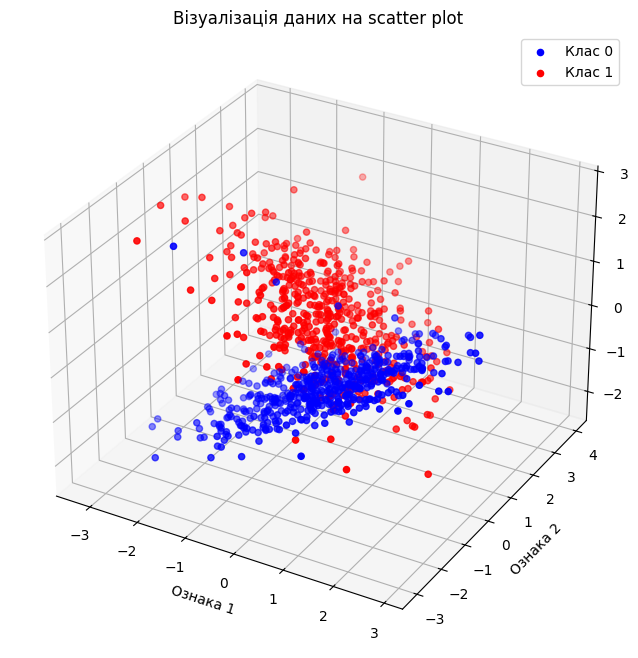

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Відокремлюємо ознаки для кожного класу
X_class0 = scaled[y == 0]
X_class1 = scaled[y == 1]

# Створюємо візуалізацію
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Відобразимо дані для кожного класу на scatter plot
ax.scatter(X_class0[:, 0], X_class0[:, 1], X_class0[:, 2], c='b', label='Клас 0')
ax.scatter(X_class1[:, 0], X_class1[:, 1], X_class1[:, 2], c='r', label='Клас 1')

# Додамо підписи до осей та легенду
ax.set_xlabel('Ознака 1')
ax.set_ylabel('Ознака 2')
ax.set_zlabel('Ознака 3')
ax.set_title('Візуалізація даних на scatter plot')
ax.legend()

# Показуємо графік
plt.show()


Метод аналізу головних компонент (PCA) дозволяє зменшити розмірність даних, зберігаючи при цьому якомога більше дисперсії вихідних даних. Давайте застосуємо PCA для зменшення розмірності ознак до двох та візуалізуємо отримані результати.



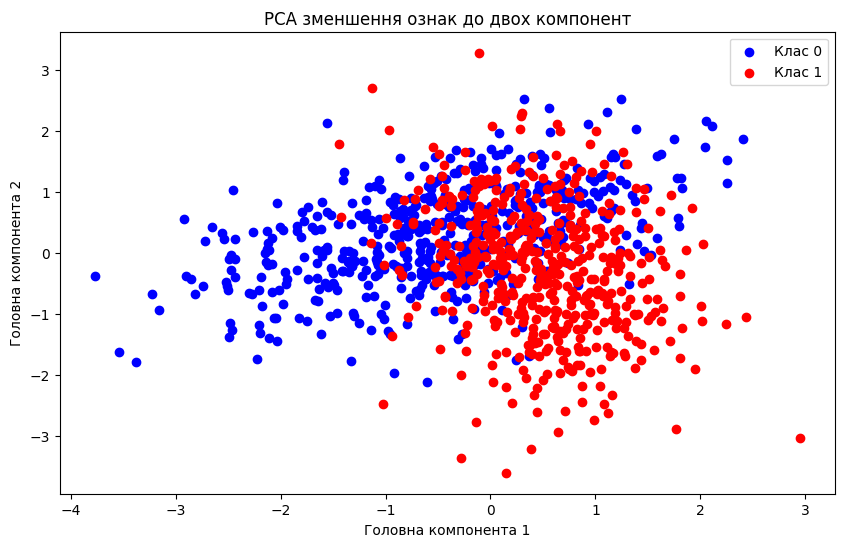

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Проводимо PCA зменшення ознак до двох компонент
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled)

# Відокремлюємо ознаки для кожного класу після зменшення розмірності
X_pca_class0 = X_pca[y == 0]
X_pca_class1 = X_pca[y == 1]

# Візуалізуємо дані після PCA на scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X_pca_class0[:, 0], X_pca_class0[:, 1], color='blue', label='Клас 0')
plt.scatter(X_pca_class1[:, 0], X_pca_class1[:, 1], color='red', label='Клас 1')
plt.title('PCA зменшення ознак до двох компонент')
plt.xlabel('Головна компонента 1')
plt.ylabel('Головна компонента 2')
plt.legend()
plt.show()


# Додаткові матеріали

1. Ще трохи про SVD (категорично рекомендую): https://youtu.be/DG7YTlGnCEo?si=Tmg0lHCzCJwARQSH
2. PCA: https://youtu.be/FgakZw6K1QQ?si=eeveI0QZnSuymBef
3. PCA: https://youtu.be/g-Hb26agBFg?si=zToD7rLtEIRFaMC-
4. SVD image compression: https://dmicz.github.io/machine-learning/svd-image-compression/
6. PCA алгоритм: https://itc.ua/ua/novini/na-commodore-64-zapustyly-shtuchnyj-intelekt-dlya-generatsiyi-zobrazhen/
7. PCA 1 - Introduction - https://youtu.be/MLknbgx7k_k?si=qDaSPGryaFiYdTFX
8. Essential Math for Data Science: Basis and Change of Basis - https://towardsdatascience.com/essential-math-for-data-science-basis-and-change-of-basis-f7af2348d463